In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#set this cv2.imshow as a function 

def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img = cv2.imread("drawing_shape.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,230,255,cv2.THRESH_BINARY)
cv_show("thresh",thresh)

In [4]:
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)


In [5]:
img_contour = img.copy()
for contour in contours:
    area = cv2.contourArea(contour, True)
    if area>300: 
        epsilon = 0.02*cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour,epsilon,True)
        corners = len(approx)
       
        result = cv2.drawContours(img_contour,contour,-1,(0,0,0),2)
        x,y,w,h = cv2.boundingRect(approx)
        cv2.rectangle(img_contour,(x,y),(x+w,y+h),[0,255,0],2)

        #below is to check the shape 
        if corners == 3:
            cv2.putText(img_contour,"Triangle",(x+w//4,y+h//2),2,1,[0,0,0],3)
        elif corners == 4:
            cv2.putText(img_contour,"Rectangle",(x+w//4,y+h//2),2,1,[0,0,0],3)
        elif corners == 5:
            cv2.putText(img_contour,"Pentagon",(x+w//4,y+h//2),2,1,[0,0,0],3)
        elif corners == 6:
            cv2.putText(img_contour,"Hexagon",(x+w//4,y+h//2),2,1,[0,0,0],3)
        else:
            cv2.putText(img_contour,"Others",(x+w//4,y+h//2),2,1,[0,0,0],3)

        #circumscribed circle
        (x,y),radius = cv2.minEnclosingCircle(contour)
        center = (int(x),int(y))
        radius = int(radius)
        cv2.circle(img_contour,center,radius,[255,0,0],2)
        
cv_show("contour",result)

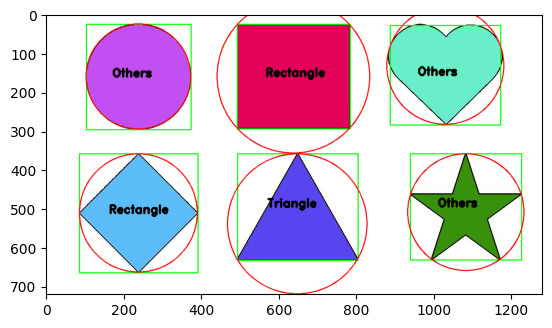

In [6]:
plt.imshow(img_contour)

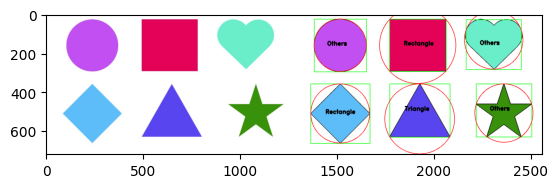

In [7]:
final = np.hstack((img,img_contour))
plt.imshow(final)